# Problem Set 3, due February 10 at 11:59am (i.e., noon).

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [62]:
# Importing relevant libraries
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt  
import sklearn as sk
import operator

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [11]:
from sklearn.datasets import load_boston
# Loading the boston dataset
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [14]:
# Printing basic information on the dataset  
print (bdata.keys)
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
print (type(bdata))

<built-in method keys of Bunch object at 0x00000186BA334B38>
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
<class 'sklearn.datasets.base.Bunch'>


In [15]:
# Transforming datset into a dataframe  leave
df = pd.DataFrame(bdata.data)
df['13'] = bdata.target
df.columns = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning (for instance, [this one](https://github.com/jrjohansson/scientific-python-lectures)).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


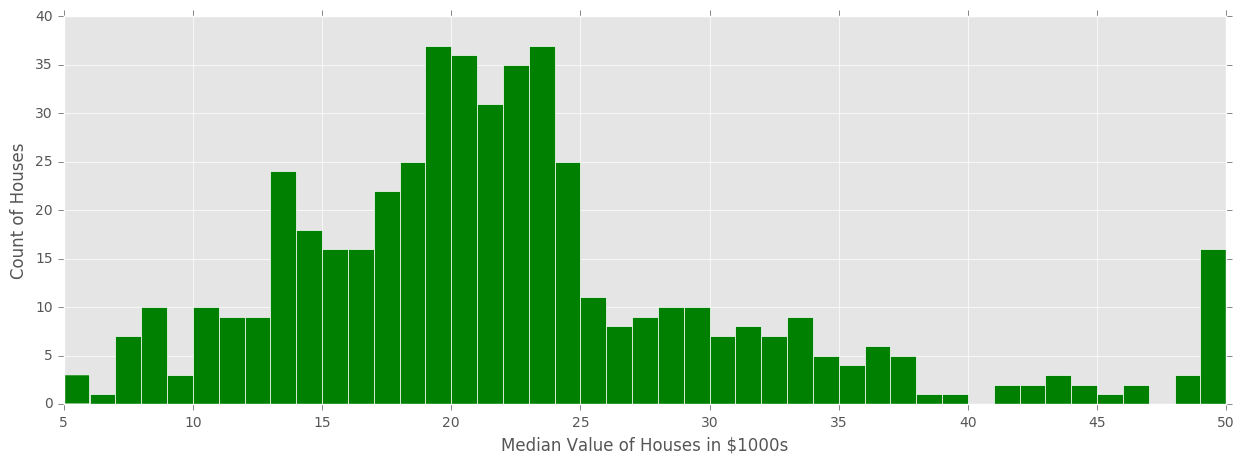

In [16]:
#importing the matplotlib library and plotting inline     
%matplotlib inline  
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# # Setting figure size
plt.figure(figsize=(15,5))
#Creating the histogram
plt.hist(df.medv, bins=45, color='g', edgecolor = 'white')
#Defining lables
plt.xlabel('Median Value of Houses in $1000s')   
plt.ylabel('Count of Houses')
plt.show()

###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


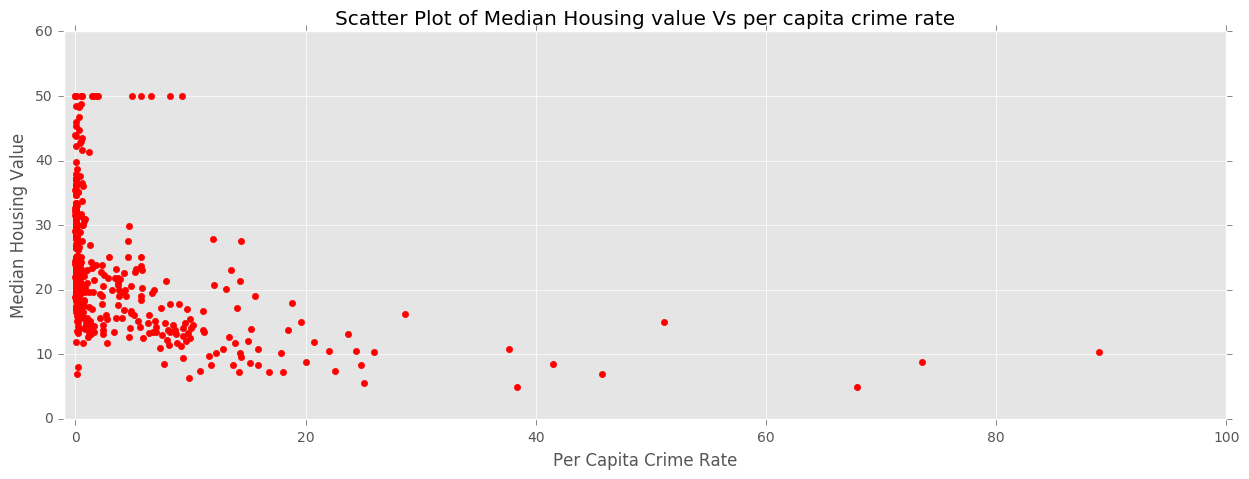

In [18]:
# For plotting inline
%matplotlib inline  
# Setting figure size
plt.figure(figsize=(15,5))
# Creating scatterplot
plt.scatter(df.crim,df.medv,color='r')
plt.xlim(-1,100)
# Defining labels
plt.ylabel('Median Housing Value')
plt.xlabel('Per Capita Crime Rate')
plt.title('Scatter Plot of Median Housing value Vs per capita crime rate')
plt.show()

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

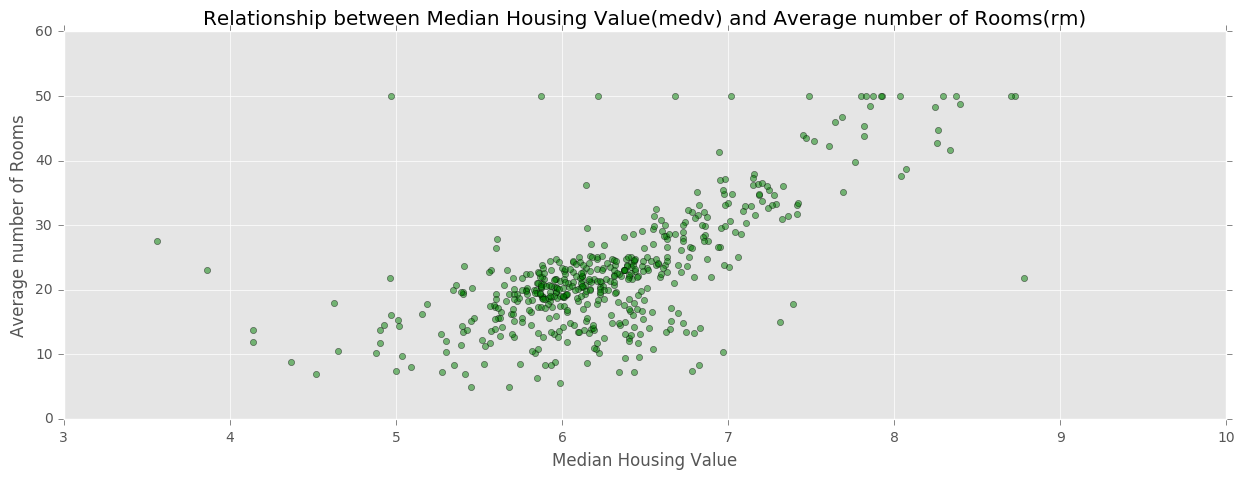

In [19]:
# For plotting inline
%matplotlib inline 
# Setting figure size
plt.figure(figsize=(15,5))
# Creating scatterplot
plt.scatter(df.rm,df.medv,color='g',edgecolor='black', alpha = 0.5)
# Defining labels
plt.title("Relationship between Median Housing Value(medv) and Average number of Rooms(rm)")
plt.xlabel("Median Housing Value")
plt.ylabel("Average number of Rooms")
plt.show()

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [63]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
    
def compute_rmse(predictions, yvalues):
# initialising rmse as zero
    rmse = 0 
# finding the square of the differences
    error_sq = (predictions - yvalues)**2
    error_sq = error_sq.sum()
# computing rmse
    rmse = np.sqrt(error_sq/float(len(predictions)))
    return rmse

In [64]:
# computing rmse as given in the example    
print (compute_rmse(np.array([2,2,3]), np.array([0,2,6])))

2.08166599947


###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [22]:
# leave the following line untouched, it will help ensure that your "random" 
# split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)
# Spliiting 66% of the boston dataset for training data
train_prop = int(round(0.66*len(df.index)))
# Randomly selecting 66% of the data for training 
bdata_train = df.sample(n=train_prop,random_state=13579)
# setting indexes not in training datset
b = set(bdata_train.index)
d = set(df.index)
a = d.difference(b)
# making test dataset
bdata_test = df.ix[a,:]

###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [23]:
# getting predicted values based on mean of training data
pred_train = np.empty(len(bdata_train.index))
pred_train.fill(bdata_train.medv.mean())
# getting training rmse between predicted values and actual values from training data
train_rmse = compute_rmse(pred_train,bdata_train.medv)
print (train_rmse)

# getting predicted values based on mean of training data
pred_test = np.empty(len(bdata_test.index))
pred_test.fill(bdata_train.medv.mean())
# getting test rmse of predicted values and actual values from testing data
test_rmse = compute_rmse(pred_test,bdata_test.medv)
print (test_rmse)

8.57443441541
10.3092622563


Answer for 2.3:

The training dataset's RMSE appears much better than that of test dataset. This is not surprising as we considered a very bad baseline and the model aims at predicting test dataset based on only train dataset which leads us to expect the test dataset to have a higher RMSE than train dataset

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [61]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x1, x2, L):
#computing distance    
    dist = x1-x2
    sqr = dist**L
    final = sqr.sum(axis = 1)
    #printing final 
    return np.array(pow(final,1/float(L)))

# Using instances to try function
print distance((3,4),(6,8),2)
print distance((3,4,5),(6,8,3),2)

SyntaxError: invalid syntax (<ipython-input-61-4b44179a7261>, line 12)

###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [40]:
"""
# write your function specification here!
"""
import time
def nneighbor(train,test,features,L):
    # starting time 
    start_time = time.time()
    # initialising rmse to zero
    rmse = 0
    # creating a dataframe to store distance matrix 
    dist_df = pd.DataFrame(index=test.index,columns=train.index)    
    # Starting a loop to calculate distance between every train and test datapoint in train 
    for i,rowi in test.iterrows():       
        for j,rowj in train.iterrows():            
            dist_df.ix[i,j] = distance(list(rowi[features]),list(rowj[features]),L) 
    # creating a dataframe to store the neighbor             
    min_arr = pd.DataFrame(index=test.index,columns=['neighbor']) 
    # Creating a loop to calculate minimum distance as the neighbor
    for i,row in dist_df.iterrows():       
        min_arr.ix[i,'neighbor'] = row.idxmin()
    # getting predicted and actual values         
    y_est = train.ix[list(min_arr.ix[:,'neighbor']),'medv'].copy()
    y_true = test.medv.copy()
    # finding rmse on predicted and actual values
    rmse = compute_rmse(np.array(y_est),np.array(y_true))
    # printing time taken by algorithm
    print ("Time taken is: " + str(round(time.time() - start_time,2)) + " seconds")  
    return rmse
# finding nearest neighbor for train and test data based on features crim and rm with L as 2
nn = nneighbor(bdata_train,bdata_test,[0,5],2)
print "Rmse for nearest neighbor predictions-",nn

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-40-f4d351aa04c8>, line 31)

###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [44]:
"""
# write your function specification here!
"""
def normalize(raw_data):
    # calculating mean and standard deviation
    avg = raw_data.mean()
    sd = np.std(raw_data)
    # using series to store the normalized data
    normalized_data = pd.Series(index=raw_data.index)    
    # starting a loop for converting raw data to normalized data
    for i,value in raw_data.iteritems():  
        # subtracting the mean and then dividing the standard deviation for each value
        x = (value - avg)/sd
        normalized_data = normalized_data.set_value(i, x)
    return normalized_data

# creating dataframes to store the normalized train and test dataset
n_train = bdata_train.copy(deep=True)
n_test = bdata_test.copy(deep=True)
# starting a loop through each column of train and test dataset
for i in n_train.columns:
    n_train.ix[:,i] = normalize(n_train.ix[:,i])
for i in n_test.columns:
    n_test.ix[:,i] = normalize(n_test.ix[:,i])    
# finding rmse for normalized data using nearest neighbor algorithm    
n2 = nneighbor(n_train,n_test,[0,5],2)
print "Rmse for nearest neighbor predictions on normalized data ",n2

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-44-7ae471a815bf>, line 27)

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [50]:
# Finding nearest neighbor for additional features
n4 = nneighbor(n_train,n_test,[0,4,5,7,10],2)
print ("Rmse for features(crim,nox,rm,dis,ptratio) -",n4)
# Changing features
n5 = nneighbor(n_train,n_test,[4,7],2)
print ("Rmse for nox and dis -",n5)

# Trying new values of L
print ("Rmse for crim and rm & L=2 -",n2)
n6 = nneighbor(n_train,n_test,[0,5],4)
print ("Rmse for crim and rm & L=4 -",n6)
n7 = nneighbor(n_train,n_test,[0,5],8)
print ("Rmse for crim and rm & L=8 -",n7)
n8 = nneighbor(n_train,n_test,[0,5],16)
print "Rmse for crim and rm & L=16 -",n8

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-50-2288ef3cdfb5>, line 15)

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [54]:
"""
Function
--------
cross_validation

Given a data and kfold value, perform the k-fold cross validation on the data

Parameters
----------
kfold : int
    numeric value indicating the number of folds for cross validation

data : Pandas DataFrame
    DataFrame containing training dataset
    
Returns
-------
avg_rmse : int 
    The average rmse value across k-fold cross validation

"""
# enter your code here
np.random.seed(seed=13579)
def cross_validation(kfold,data):
    start_time = time.time()    
    # using series to store rmse for each fold
    rmse = pd.Series(index=range(kfold))
    # Finding the number of values in each subsample
    n = (len(data))/kfold       
        
    d = data.copy()
    # Selecting number of evenly divided rows within train and test dataset 
    d = data.head(n*kfold)    
    # Creating a dataframe to store indexes for each subsample as a row    
    subsamples = pd.DataFrame(index=range(kfold),columns=range(n))    
    
    ind = pd.Series(d.index.values.copy())    
    # Randomly shuffling indexes
    np.random.shuffle(ind)       
    i=0   
    rowi = 0
    # Starting a loop to create each row as a subsample
    while((i+n)<len(data)):
        subsamples.iloc[rowi,:] = list(ind.iloc[i:(i+n)])
        i = i+n
        rowi = rowi+1         
    
    for i in range(kfold):
        # selecting one of the subsample as test
        test_ind = subsamples.iloc[i,:]       
        # finding indexes that are not in test
        b = set(test_ind)
        c = set(d.index)
        a = c.difference(b)
        # creating the train and test dataset
        train = d.ix[a,:].copy()
        test = d.ix[b,:].copy()    
        
        # computing rmse using nearest neighbor
        n = nneighbor(train,test,[0,5],2) 
        # storing rmse for each fold
        rmse = rmse.set_value(i, n)  
    
    # finding average rmse across k-fold
    avg_rmse = rmse.mean()
    print ("Total k-fold Time taken: " + str(round(time.time() - start_time,2)) + " seconds")    
    return avg_rmse
    
# finding rmse for 10-fold cross validation    
res = cross_validation(10,n_train)
print "Average rmse for 10-fold cross validation-",res

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-54-1b607c51a492>, line 72)

###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [65]:
"""
Function 1
--------
knn

Given a training dataset, test dataset, input features, L and K, compute the rmse using K Nearest neighbor algorithm

Parameters
----------
train : Pandas DataFrame
    DataFrame containing the training data

test : Pandas DataFrame
    DataFrame containing the test data

features : list
    list of columns that are used as input features to fit the model

L : int
    numeric value that is used in calculating Euclidean distance
    
K : int
    numeric value indicating the number of neighbors to use for modelling
    
Returns
-------
rmse : int 
    The average rmse value for K-nearest neighbor algorithm

"""
def knn(train,test,features,L,K):    
    start_time = time.time()   
    # initialising rmse to zero
    rmse = 0                          
    # creating a dataframe to store the distance matrix 
    dist_df = pd.DataFrame(index=test.index,columns=train.index)     
    # starting a Loop to calculate the distance between every tarin and test dagtapoint
    for i,rowi in test.iterrows():       
        for j,rowj in train.iterrows():           
            dist_df.ix[i,j] = distance(list(rowi[features]),list(rowj[features]),L)       
            
    # creating a dataframe to store K nearest neighbors
    min_arr = pd.DataFrame(index=test.index,columns=range(K))  
    y_est = pd.Series(index=test.index)
    # starting loop to compute the K neighbors based on order of ascending distance 
    for i,row in dist_df.iterrows():    
        r = row.sort_values()       
        min_arr.ix[i,:] = pd.Series(r[:K].index)        
    # starting a loop to find mean of K-nearest neighbors as predicted values
    for i,row in min_arr.iterrows():      
        y_est.ix[i] = train.ix[row,'medv'].mean()
       
    y_true = test.medv.copy()   
    # finding rmse 
    rmse = compute_rmse(np.array(y_est),np.array(y_true))    
    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"      
    return rmse

SyntaxError: invalid syntax (<ipython-input-65-f67ca0ba9643>, line 56)

In [66]:
"""
Function 2
--------
knn_cross_validation

Given a data and kfold value, performing k-fold cross validation on the data
"""
def knn_cross_validation(kfold,data,features,L,K):
    start_time = time.time()    
    # using series to store rmse for each fold
    rmse = pd.Series(index=range(kfold))
    # Finding the number of values in each subsample
    n = (len(data))/kfold       
        
    d = data.copy()
    # Selecting rows that are evenly divided within train and test dataset 
    d = data.head(n*kfold)    
    # creating a dataframe to store indexes for each subsample as a row    
    subsamples = pd.DataFrame(index=range(kfold),columns=range(n))    
    
    ind = pd.Series(d.index.values.copy())    
    # Randomly shuffling indexes
    np.random.shuffle(ind)       
    i=0   
    rowi = 0
    # starting a loop to create each row as a subsample
    while((i+n)<len(data)):
        subsamples.iloc[rowi,:] = list(ind.iloc[i:(i+n)])
        i = i+n
        rowi = rowi+1         
    
    for i in range(kfold):
        # selecting one of the subsample as test
        test_ind = subsamples.iloc[i,:]       
        # finding indexes that are not in test
        b = set(test_ind)
        c = set(d.index)
        a = c.difference(b)
        # creating the train and test dataset
        train = d.ix[a,:].copy()
        test = d.ix[b,:].copy()    
        
        # finding rmse using K-nearest neighbors
        n = knn(train,test,features,L,K) 
        # storing rmse for each fold
        rmse = rmse.set_value(i, n)  
    
    # finding average rmse across k-fold
    avg_rmse = rmse.mean()
    print "Total k-fold Time taken: " + str(round(time.time() - start_time,2)) + " seconds"    
    return avg_rmse

# Computing 10-fold cross validation using crim and rm as input features
cvk = knn_cross_validation(10,n_train,[0,5],2,3)
print "Average rmse for 10-fold cross validation with K as 3 -",cvk

SyntaxError: invalid syntax (<ipython-input-66-9a36a2ed547e>, line 50)

###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [67]:
start_time = time.time()
# using series to store rmse for each value of K
rmse = pd.Series(index=range(1,26))
# starting a loop to compute average rmse for 10-fold cross validation
for K in range(1,26):
    rmse.ix[K] = knn_cross_validation(10,n_train,[0,1,5,6,7,9],2,K)
    print ("rmse ",K,rmse.ix[K])
print "K value for lowest rmse - ",rmse.idxmin()    

print "Total Time taken for finding optimum K: " + str(round(time.time() - start_time,2)) + " seconds"

SyntaxError: invalid syntax (<ipython-input-67-4acd55051d1b>, line 8)